In [61]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src/')

import torch
import torch.optim as optim
from torchvision import datasets, transforms


from models.simple_LSTM import *
from models.train_model import train

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [63]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Lambda(lambda x: torch.flatten(x))
        ])

dataset = datasets.MNIST('../data/', download=True, train=True, transform=transform)
dataset.targets[dataset.targets % 2 == 0] = float(-1.0)
dataset.targets[dataset.targets % 2 == 1] = float(1.0)

train_loader = torch.utils.data.DataLoader(dataset, batch_size = 500)

In [64]:
image_size = 28
input_size = image_size * image_size
hidden_size = 10
num_layers = 2

model = SimpleLSTM(input_size, hidden_size, num_layers)
optimizer = optim.Adam(model.parameters())
criterion = nn.BCELoss()
num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'The model has {num_params:,} trainable parameters')


The model has 32,731 trainable parameters


In [65]:
len(train_loader.dataset) // len(train_loader)

500

  0%|          | 0/1 [00:00<?, ?it/s]

Train Epoch: 0-000 batch_loss=3.11e-03 
Train Epoch: 0-050 batch_loss=2.97e-03 
Train Epoch: 0-100 batch_loss=2.77e-03 


100%|██████████| 1/1 [00:08<00:00,  8.00s/it]


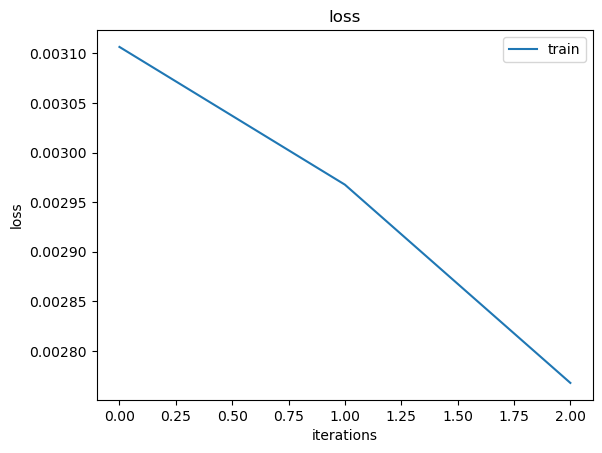

In [70]:
train(model, train_loader, optimizer, criterion, device, n_epochs=1)